In [219]:
###IMPORT LIBRARIES

In [220]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import time 
import datetime 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [221]:
data_read = pd.read_csv('NEW-DATA-1.T15.txt',sep=' ', error_bad_lines=False)

In [222]:
data_read.head(2)

,1:Date,2:Time,3:Temperature_Comedor_Sensor,4:Temperature_Habitacion_Sensor,5:Weather_Temperature,6:CO2_Comedor_Sensor,7:CO2_Habitacion_Sensor,8:Humedad_Comedor_Sensor,9:Humedad_Habitacion_Sensor,10:Lighting_Comedor_Sensor,...,15:Meteo_Exterior_Sol_Oest,16:Meteo_Exterior_Sol_Est,17:Meteo_Exterior_Sol_Sud,18:Meteo_Exterior_Piranometro,19:Exterior_Entalpic_1,20:Exterior_Entalpic_2,21:Exterior_Entalpic_turbo,22:Temperature_Exterior_Sensor,23:Humedad_Exterior_Sensor,24:Day_Of_Week
0,13/03/2012,11:45,18.1875,17.8275,0.0,216.560,221.920,39.9125,42.4150,81.6650,...,9690.24,12604.2,95436.8,758.880,0,0,0,18.1150,48.375,2.0
1,13/03/2012,12:00,18.4633,18.1207,6.8,219.947,220.363,39.9267,42.2453,81.7413,...,11022.00,10787.2,95436.8,762.069,0,0,0,18.4147,47.808,2.0


In [223]:
data_read.columns

Index(['1:Date', '2:Time', '3:Temperature_Comedor_Sensor',
       '4:Temperature_Habitacion_Sensor', '5:Weather_Temperature',
       '6:CO2_Comedor_Sensor', '7:CO2_Habitacion_Sensor',
       '8:Humedad_Comedor_Sensor', '9:Humedad_Habitacion_Sensor',
       '10:Lighting_Comedor_Sensor', '11:Lighting_Habitacion_Sensor',
       '12:Precipitacion', '13:Meteo_Exterior_Crepusculo',
       '14:Meteo_Exterior_Viento', '15:Meteo_Exterior_Sol_Oest',
       '16:Meteo_Exterior_Sol_Est', '17:Meteo_Exterior_Sol_Sud',
       '18:Meteo_Exterior_Piranometro', '19:Exterior_Entalpic_1',
       '20:Exterior_Entalpic_2', '21:Exterior_Entalpic_turbo',
       '22:Temperature_Exterior_Sensor', '23:Humedad_Exterior_Sensor',
       '24:Day_Of_Week'],
      dtype='object')

In [224]:
cols = data_read.select_dtypes(exclude=['float']).columns
data_read[cols] = data_read[cols].apply(pd.to_numeric, downcast='float', errors='coerce')

In [225]:
print(data_read.dtypes)

1:Date                             float32
2:Time                             float32
3:Temperature_Comedor_Sensor       float64
4:Temperature_Habitacion_Sensor    float64
5:Weather_Temperature              float64
6:CO2_Comedor_Sensor               float64
7:CO2_Habitacion_Sensor            float64
8:Humedad_Comedor_Sensor           float64
9:Humedad_Habitacion_Sensor        float64
10:Lighting_Comedor_Sensor         float64
11:Lighting_Habitacion_Sensor      float64
12:Precipitacion                   float64
13:Meteo_Exterior_Crepusculo       float64
14:Meteo_Exterior_Viento           float64
15:Meteo_Exterior_Sol_Oest         float64
16:Meteo_Exterior_Sol_Est          float64
17:Meteo_Exterior_Sol_Sud          float64
18:Meteo_Exterior_Piranometro      float64
19:Exterior_Entalpic_1             float32
20:Exterior_Entalpic_2             float32
21:Exterior_Entalpic_turbo         float32
22:Temperature_Exterior_Sensor     float64
23:Humedad_Exterior_Sensor         float64
24:Day_Of_W

In [226]:

data_read['Indoor Temperature']=data_read.iloc[:,[2,3]].mean(axis=1)
data_read['CO2 in ppm']=data_read.iloc[:,[5,6]].mean(axis=1)
data_read['Relative Humidity']=data_read.iloc[:,[7,8]].mean(axis=1)
data_read['Lighting']=data_read.iloc[:,[9,10]].mean(axis=1)
data_read['sunlighgt']=data_read.iloc[:,[14,15,16]].mean(axis=1)


In [227]:
data_read

,1:Date,2:Time,3:Temperature_Comedor_Sensor,4:Temperature_Habitacion_Sensor,5:Weather_Temperature,6:CO2_Comedor_Sensor,7:CO2_Habitacion_Sensor,8:Humedad_Comedor_Sensor,9:Humedad_Habitacion_Sensor,10:Lighting_Comedor_Sensor,...,20:Exterior_Entalpic_2,21:Exterior_Entalpic_turbo,22:Temperature_Exterior_Sensor,23:Humedad_Exterior_Sensor,24:Day_Of_Week,Indoor Temperature,CO2 in ppm,Relative Humidity,Lighting,sunlighgt
0,NaN,NaN,18.1875,17.8275,0.0000,216.560,221.920,39.9125,42.4150,81.6650,...,0.0,0.0,18.1150,48.3750,2.0,18.00750,219.2400,41.16375,97.59250,39243.746667
1,NaN,NaN,18.4633,18.1207,6.8000,219.947,220.363,39.9267,42.2453,81.7413,...,0.0,0.0,18.4147,47.8080,2.0,18.29200,220.1550,41.08600,97.67315,39082.000000
2,NaN,NaN,18.7673,18.4367,17.0000,219.403,218.933,39.7720,42.2267,81.4240,...,0.0,0.0,18.8533,47.4320,2.0,18.60200,219.1680,40.99935,97.51200,39676.243333
3,NaN,NaN,19.0727,18.7513,18.0000,218.613,217.045,39.7760,42.0987,81.5013,...,0.0,0.0,19.2907,47.0240,2.0,18.91200,217.8290,40.93735,97.42265,41173.210000
4,NaN,NaN,19.3721,19.0414,20.0000,217.714,216.080,39.7757,42.0686,81.4657,...,0.0,0.0,19.7400,45.4743,2.0,19.20675,216.8970,40.92215,97.24985,43637.406667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2759,NaN,NaN,21.1520,20.8187,13.0000,190.539,192.181,41.3120,41.6880,11.4427,...,0.0,0.0,16.6180,49.2960,3.0,20.98535,191.3600,41.50000,12.19135,0.000000
2760,NaN,NaN,21.0413,20.7053,12.1333,190.421,193.067,41.3173,41.7200,11.6867,...,0.0,0.0,16.4013,50.0373,3.0,20.87330,191.7440,41.51865,15.50335,1235.284667
2761,NaN,NaN,20.9347,20.5827,12.0000,190.432,193.653,41.3333,41.7573,19.5387,...,0.0,0.0,16.2607,50.0587,3.0,20.75870,192.0425,41.54530,21.39070,7668.746667
2762,NaN,NaN,20.8560,20.5200,12.0000,191.531,193.387,41.3093,41.8107,20.9853,...,0.0,0.0,16.2367,49.8400,3.0,20.68800,192.4590,41.56000,22.21265,17403.006667


In [228]:
data_read=data_read.drop(['1:Date','2:Time','6:CO2_Comedor_Sensor','7:CO2_Habitacion_Sensor','8:Humedad_Comedor_Sensor','9:Humedad_Habitacion_Sensor','10:Lighting_Comedor_Sensor','11:Lighting_Habitacion_Sensor','15:Meteo_Exterior_Sol_Oest','16:Meteo_Exterior_Sol_Est','17:Meteo_Exterior_Sol_Sud'],axis=1)

In [229]:
data_read

,3:Temperature_Comedor_Sensor,4:Temperature_Habitacion_Sensor,5:Weather_Temperature,12:Precipitacion,13:Meteo_Exterior_Crepusculo,14:Meteo_Exterior_Viento,18:Meteo_Exterior_Piranometro,19:Exterior_Entalpic_1,20:Exterior_Entalpic_2,21:Exterior_Entalpic_turbo,22:Temperature_Exterior_Sensor,23:Humedad_Exterior_Sensor,24:Day_Of_Week,Indoor Temperature,CO2 in ppm,Relative Humidity,Lighting,sunlighgt
0,18.1875,17.8275,0.0000,0.0,623.360,1.426250,758.8800,0.0,0.0,0.0,18.1150,48.3750,2.0,18.00750,219.2400,41.16375,97.59250,39243.746667
1,18.4633,18.1207,6.8000,0.0,623.211,1.592000,762.0690,0.0,0.0,0.0,18.4147,47.8080,2.0,18.29200,220.1550,41.08600,97.67315,39082.000000
2,18.7673,18.4367,17.0000,0.0,622.656,1.891330,766.2510,0.0,0.0,0.0,18.8533,47.4320,2.0,18.60200,219.1680,40.99935,97.51200,39676.243333
3,19.0727,18.7513,18.0000,0.0,622.571,1.828000,766.0370,0.0,0.0,0.0,19.2907,47.0240,2.0,18.91200,217.8290,40.93735,97.42265,41173.210000
4,19.3721,19.0414,20.0000,0.0,622.400,2.360710,762.7430,0.0,0.0,0.0,19.7400,45.4743,2.0,19.20675,216.8970,40.92215,97.24985,43637.406667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2759,21.1520,20.8187,13.0000,0.0,392.603,0.074667,-3.4340,0.0,0.0,0.0,16.6180,49.2960,3.0,20.98535,191.3600,41.50000,12.19135,0.000000
2760,21.0413,20.7053,12.1333,0.0,613.120,0.000000,3.8520,0.0,0.0,0.0,16.4013,50.0373,3.0,20.87330,191.7440,41.51865,15.50335,1235.284667
2761,20.9347,20.5827,12.0000,0.0,613.803,0.310667,26.8300,0.0,0.0,0.0,16.2607,50.0587,3.0,20.75870,192.0425,41.54530,21.39070,7668.746667
2762,20.8560,20.5200,12.0000,0.0,615.403,0.299333,66.9493,0.0,0.0,0.0,16.2367,49.8400,3.0,20.68800,192.4590,41.56000,22.21265,17403.006667


In [230]:
data_read=data_read.drop(['3:Temperature_Comedor_Sensor','4:Temperature_Habitacion_Sensor'],axis=1)

In [231]:
data_read

,5:Weather_Temperature,12:Precipitacion,13:Meteo_Exterior_Crepusculo,14:Meteo_Exterior_Viento,18:Meteo_Exterior_Piranometro,19:Exterior_Entalpic_1,20:Exterior_Entalpic_2,21:Exterior_Entalpic_turbo,22:Temperature_Exterior_Sensor,23:Humedad_Exterior_Sensor,24:Day_Of_Week,Indoor Temperature,CO2 in ppm,Relative Humidity,Lighting,sunlighgt
0,0.0000,0.0,623.360,1.426250,758.8800,0.0,0.0,0.0,18.1150,48.3750,2.0,18.00750,219.2400,41.16375,97.59250,39243.746667
1,6.8000,0.0,623.211,1.592000,762.0690,0.0,0.0,0.0,18.4147,47.8080,2.0,18.29200,220.1550,41.08600,97.67315,39082.000000
2,17.0000,0.0,622.656,1.891330,766.2510,0.0,0.0,0.0,18.8533,47.4320,2.0,18.60200,219.1680,40.99935,97.51200,39676.243333
3,18.0000,0.0,622.571,1.828000,766.0370,0.0,0.0,0.0,19.2907,47.0240,2.0,18.91200,217.8290,40.93735,97.42265,41173.210000
4,20.0000,0.0,622.400,2.360710,762.7430,0.0,0.0,0.0,19.7400,45.4743,2.0,19.20675,216.8970,40.92215,97.24985,43637.406667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2759,13.0000,0.0,392.603,0.074667,-3.4340,0.0,0.0,0.0,16.6180,49.2960,3.0,20.98535,191.3600,41.50000,12.19135,0.000000
2760,12.1333,0.0,613.120,0.000000,3.8520,0.0,0.0,0.0,16.4013,50.0373,3.0,20.87330,191.7440,41.51865,15.50335,1235.284667
2761,12.0000,0.0,613.803,0.310667,26.8300,0.0,0.0,0.0,16.2607,50.0587,3.0,20.75870,192.0425,41.54530,21.39070,7668.746667
2762,12.0000,0.0,615.403,0.299333,66.9493,0.0,0.0,0.0,16.2367,49.8400,3.0,20.68800,192.4590,41.56000,22.21265,17403.006667


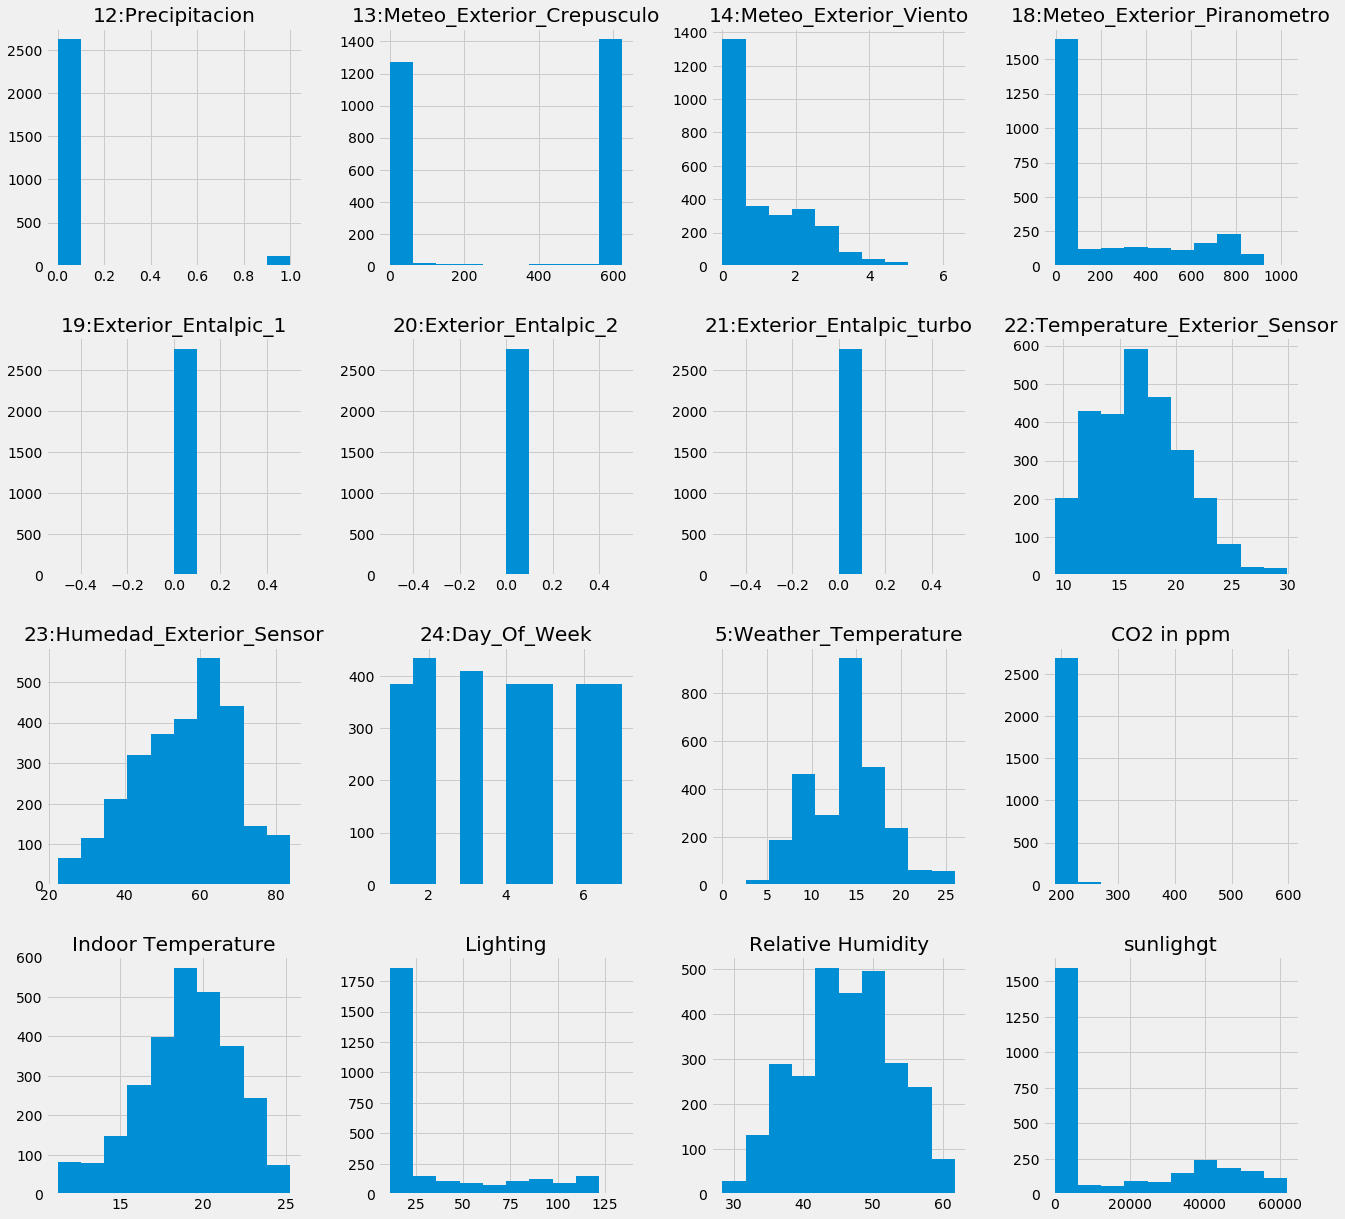

In [232]:
data_read.hist(figsize=(20,20));

In [233]:
y=data_read['Indoor Temperature']

In [234]:
X = data_read.drop(['Indoor Temperature'], axis=1)

In [235]:
X = X.values

In [236]:
y = y.values

In [237]:
y

array([18.0075 , 18.292  , 18.602  , ..., 20.7587 , 20.688  , 20.60135])

In [238]:
from sklearn import linear_model
from sklearn.feature_selection import RFE

In [239]:
model = linear_model.LinearRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X, y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 3
Selected Features: [False  True False  True False False False False  True False False False
 False False False]
Feature Ranking: [ 3  1  8  1  6 12 11 13  1  5  4  7  2  9 10]


In [240]:
type(X)

numpy.ndarray

In [241]:
X.shape

(2764, 15)

In [242]:
y.shape

(2764,)

In [243]:
length_of_dataset = len(X)

In [244]:
length_of_dataset

2764

In [245]:
training_length = 0.80*length_of_dataset

In [246]:
round_length_training = round(training_length)

In [247]:
round_length_training

2211

In [248]:
length_testing = length_of_dataset - round_length_training

In [249]:
length_testing

553

In [250]:
X_train = X[:round_length_training]

In [251]:
X_test = X[round_length_training:]

In [252]:
X_test.shape

(553, 15)

In [253]:
X_train.shape

(2211, 15)

In [254]:
y_train = y[:round_length_training]

In [255]:
y_train.shape

(2211,)

In [256]:
y_test = y[round_length_training:]

In [257]:
y_test.shape

(553,)

In [258]:
regressor = LinearRegression()

In [259]:
dir(regressor)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_set_intercept',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'n_jobs',
 'normalize',
 'predict',
 'score',
 'set_params']

In [260]:
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [261]:
y_train

array([18.0075 , 18.292  , 18.602  , ..., 20.56465, 20.7467 , 20.96135])

In [262]:
X_train

array([[0.00000000e+00, 0.00000000e+00, 6.23360000e+02, ...,
        4.11637500e+01, 9.75925000e+01, 3.92437467e+04],
       [6.80000000e+00, 0.00000000e+00, 6.23211000e+02, ...,
        4.10860000e+01, 9.76731500e+01, 3.90820000e+04],
       [1.70000000e+01, 0.00000000e+00, 6.22656000e+02, ...,
        4.09993500e+01, 9.75120000e+01, 3.96762433e+04],
       ...,
       [1.90000000e+01, 0.00000000e+00, 6.21504000e+02, ...,
        5.69493500e+01, 9.43040000e+01, 3.82047667e+04],
       [1.90000000e+01, 0.00000000e+00, 6.20821000e+02, ...,
        5.70440000e+01, 9.53780000e+01, 3.83185333e+04],
       [1.84667000e+01, 0.00000000e+00, 6.20395000e+02, ...,
        5.68346500e+01, 7.84406500e+01, 3.14809667e+04]])

In [263]:
print(X_train)

[[0.00000000e+00 0.00000000e+00 6.23360000e+02 ... 4.11637500e+01
  9.75925000e+01 3.92437467e+04]
 [6.80000000e+00 0.00000000e+00 6.23211000e+02 ... 4.10860000e+01
  9.76731500e+01 3.90820000e+04]
 [1.70000000e+01 0.00000000e+00 6.22656000e+02 ... 4.09993500e+01
  9.75120000e+01 3.96762433e+04]
 ...
 [1.90000000e+01 0.00000000e+00 6.21504000e+02 ... 5.69493500e+01
  9.43040000e+01 3.82047667e+04]
 [1.90000000e+01 0.00000000e+00 6.20821000e+02 ... 5.70440000e+01
  9.53780000e+01 3.83185333e+04]
 [1.84667000e+01 0.00000000e+00 6.20395000e+02 ... 5.68346500e+01
  7.84406500e+01 3.14809667e+04]]


In [264]:
print(regressor.intercept_)

9.902039657144798


In [265]:
print(regressor.coef_)

[-2.25803429e-02 -8.94944053e-01 -5.54787968e-04 -4.78629930e-01
 -2.90188654e-03  7.77156117e-16 -8.04911693e-16  2.22044605e-16
  8.19027062e-01  3.62576999e-02 -1.42214736e-02  4.17562274e-03
 -1.31719342e-01  2.12830392e-03  6.70068253e-06]


In [266]:
y_pred = regressor.predict(X_test)

In [267]:
y_pred

array([18.32144561, 18.02419002, 18.95163586, 19.36075419, 19.24312202,
       18.99361356, 19.89127758, 19.01431794, 18.98837247, 18.3229196 ,
       19.11134028, 19.0490107 , 19.03020774, 19.16498476, 19.16323204,
       19.22175935, 19.41863747, 19.8873597 , 19.25484289, 19.31967991,
       19.60706557, 19.69181282, 19.59486669, 18.99851755, 19.48754911,
       19.15321553, 19.015452  , 19.09924071, 18.99498234, 18.71258568,
       19.07005628, 18.98404183, 18.83149005, 17.74345796, 17.8634012 ,
       17.06995909, 16.79107395, 16.80441479, 16.66185558, 17.01126515,
       17.03122257, 16.83833471, 17.20516611, 17.01918817, 17.17804829,
       17.54913781, 17.53609619, 17.1135529 , 17.51323568, 17.47407163,
       17.43590951, 17.43128127, 17.38074044, 17.31031084, 17.25673677,
       17.17945593, 17.04390253, 17.07782422, 17.02217548, 16.9629949 ,
       16.92157788, 16.85401499, 16.53639102, 16.48382908, 16.64728708,
       16.51066749, 16.49729249, 16.51820785, 16.45940285, 16.11

In [268]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Absolute Error: 0.808317882301286
Mean Squared Error: 1.2083061309409366


In [269]:
model=LinearRegression()

In [270]:
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("Training Accuracy:",model.score(X_train,y_train))
print("Testing Accuracy:",model.score(X_test,y_test))

Training Accuracy: 0.9127904951703928
Testing Accuracy: 0.7974472580918454
